In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [233]:
movies=pd.read_csv('tmdb-movies.csv')

In [3]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# DATA CLEANING

In [6]:
nan_values=movies.isnull().sum()
print(100*(nan_values)/(sum(nan_values)))

id                       0.000000
imdb_id                  0.074438
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.565729
homepage                59.029329
director                 0.327527
tagline                 21.021289
keywords                11.113592
overview                 0.029775
runtime                  0.000000
genres                   0.171207
production_companies     7.667113
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64


Dropping columns having more then 10% NaN values and least important columns

In [234]:
movies.drop(['keywords','production_companies','homepage','tagline','id','overview','popularity', 'vote_average'],1,inplace=True)

The columns remaining with NaN values are genres,imdb_id,cast. I will drop the rows with NaN values because a movie with no cast or no genre is not possible

In [235]:
movies=movies.dropna()

In [9]:
movies.isnull().sum()

imdb_id           0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

Now we have cleaned dataframe and now let's do EDA

# EXPLORATORY DATA ANALYSIS

For simplicity converting the budget and revenue values to Millions

In [236]:
movies['budget']=movies['budget']/1000000
movies['revenue']=movies['revenue']/1000000

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness = 3.6923538147108763
Kurtosis = 19.019579959362385


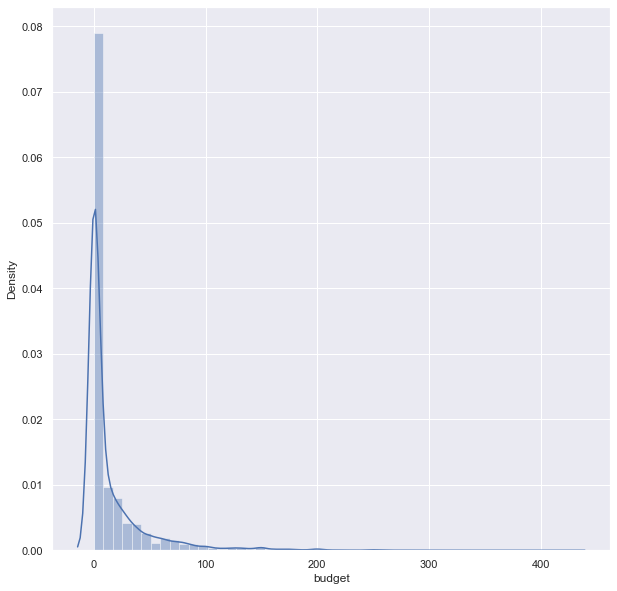

In [11]:
plt.figure(figsize=(10,10))
sns.distplot(movies['budget'])
print("Skewness =",movies['budget'].skew())
print("Kurtosis =",movies['budget'].kurt())

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness = 6.617889717313621
Kurtosis = 72.30285055052678


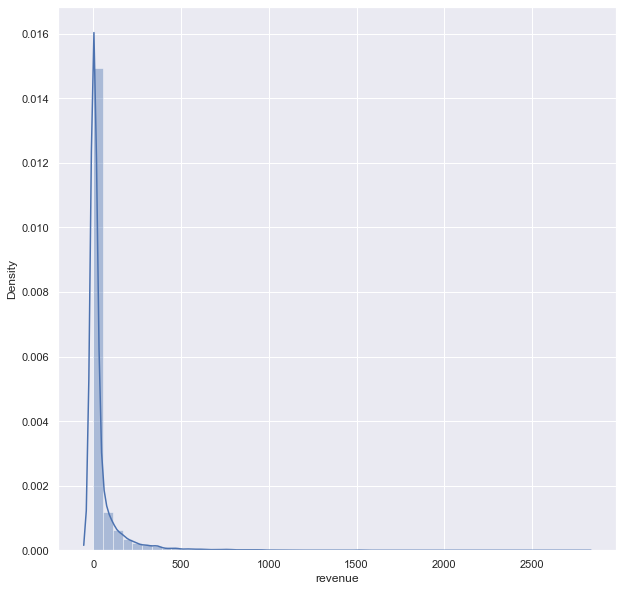

In [12]:
plt.figure(figsize=(10,10))
sns.distplot(movies['revenue'])
print("Skewness =",movies['revenue'].skew())
print("Kurtosis =",movies['revenue'].kurt())

Same like budget this is also positively skewed and has high kurtosis value and also there are very less films which have earned more then 500 Million

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

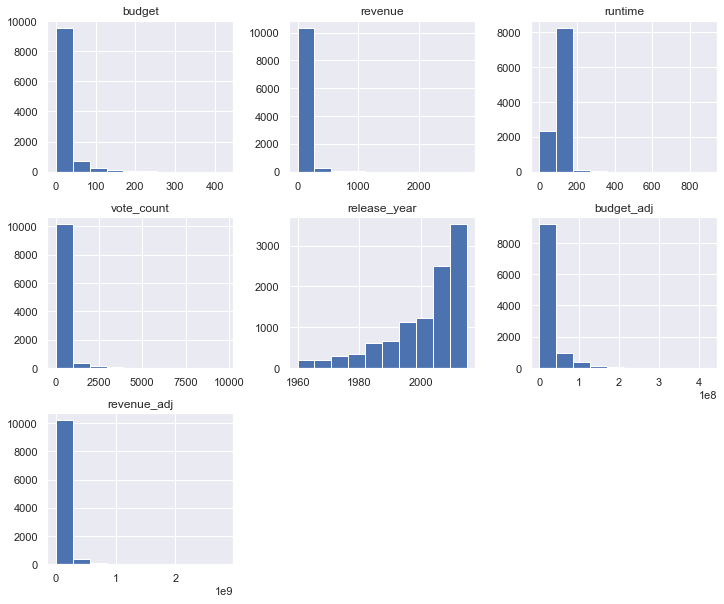

In [13]:
movies.hist(figsize=(12,10))

In [238]:
s = movies['genres'].str.split('|').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del movies['genres']
movies = movies.join(s)

In [237]:
movies['profit']=movies['revenue']-movies['budget']

In [36]:
df=movies.groupby('genres').mean()

Text(0, 0.5, 'Budget')

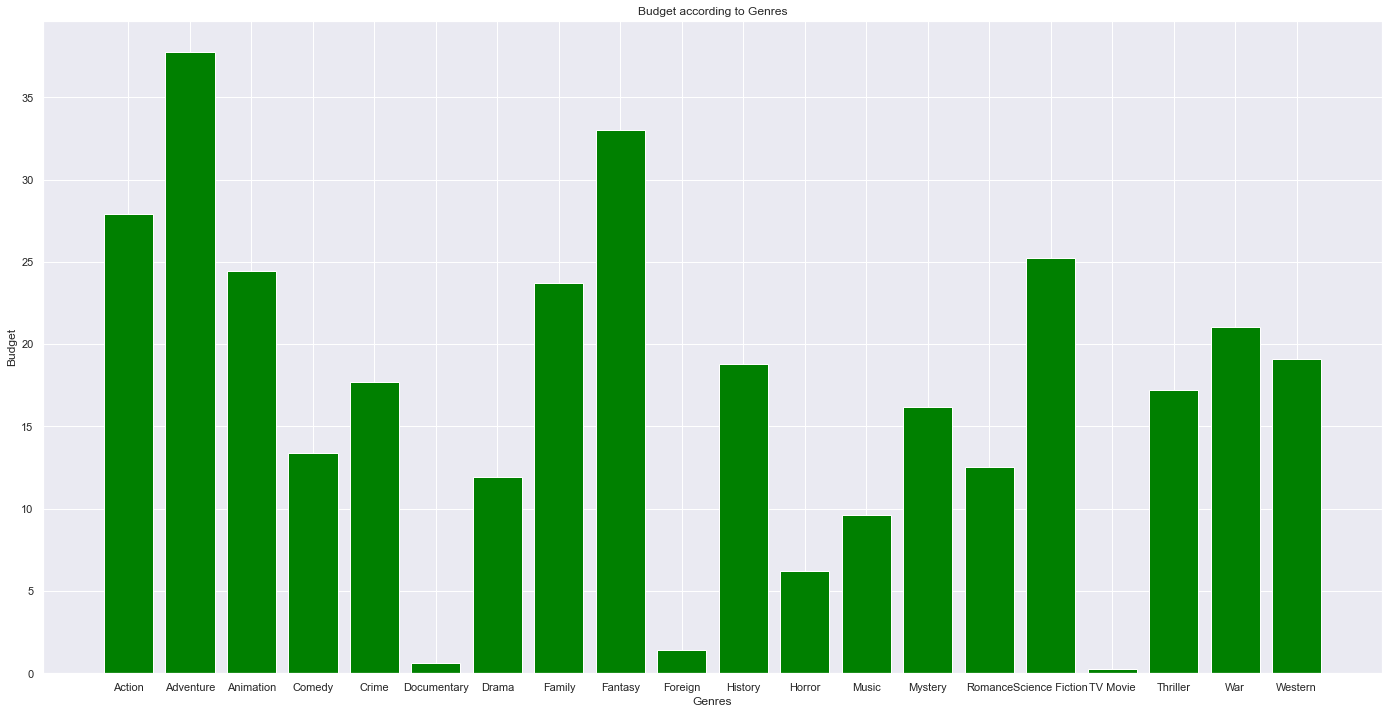

In [98]:
plt.figure(figsize=(24,12))
plt.bar(df.index,df['budget'],color='green')
plt.title("Budget according to Genres")
plt.xlabel("Genres")
plt.ylabel("Budget")

Text(0, 0.5, 'Budget')

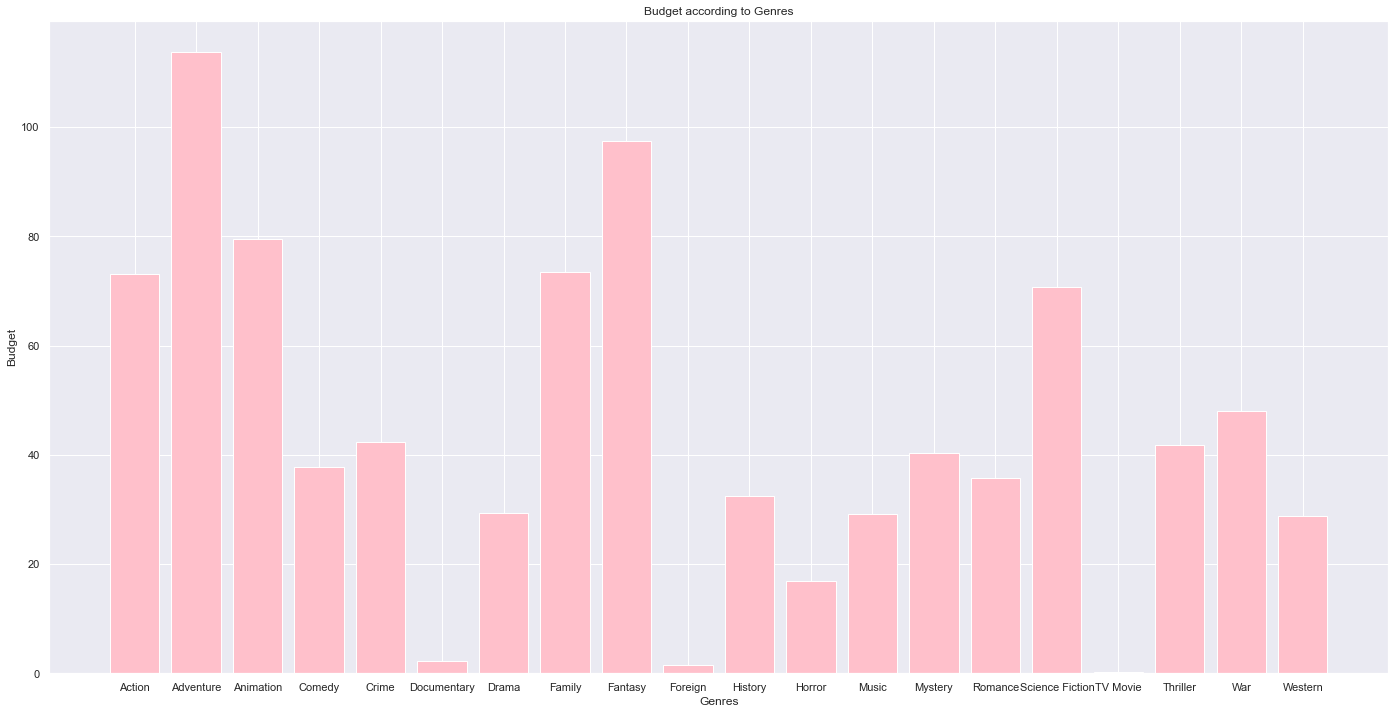

In [96]:
plt.figure(figsize=(24,12))
plt.bar(df.index,df['revenue'],color='pink')
plt.title("Budget according to Genres")
plt.xlabel("Genres")
plt.ylabel("Budget")

Text(0, 0.5, 'Budget')

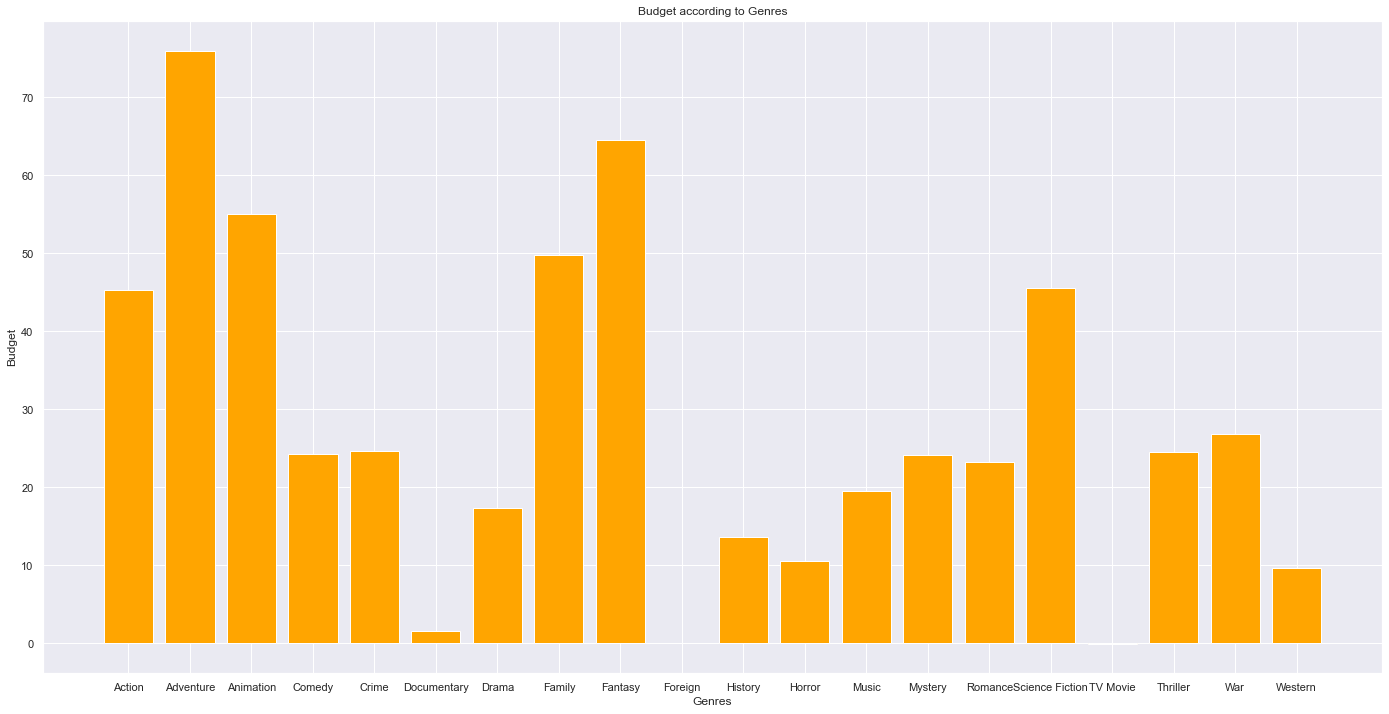

In [95]:
plt.figure(figsize=(24,12))
plt.bar(df.index,df['profit'],color='orange')
plt.title("Budget according to Genres")
plt.xlabel("Genres")
plt.ylabel("Budget")

Text(0.5, 0, 'Years')

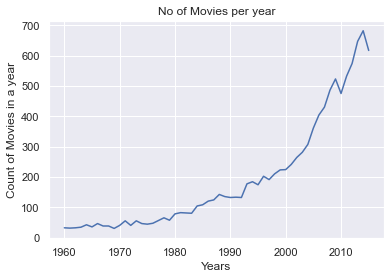

In [58]:
plt.figsize=(10,8)
plt.plot(pd.DataFrame(movies.groupby('release_year').original_title.nunique()))
plt.title("No of Movies per year")
plt.ylabel("Count of Movies in a year")
plt.xlabel("Years")

In [60]:
movies.columns

Index(['imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'release_date', 'vote_count', 'release_year', 'budget_adj',
       'revenue_adj', 'genres', 'profit'],
      dtype='object')

In [61]:
top_directors=movies.groupby('director').mean()

Text(0, 0.5, 'Budget')

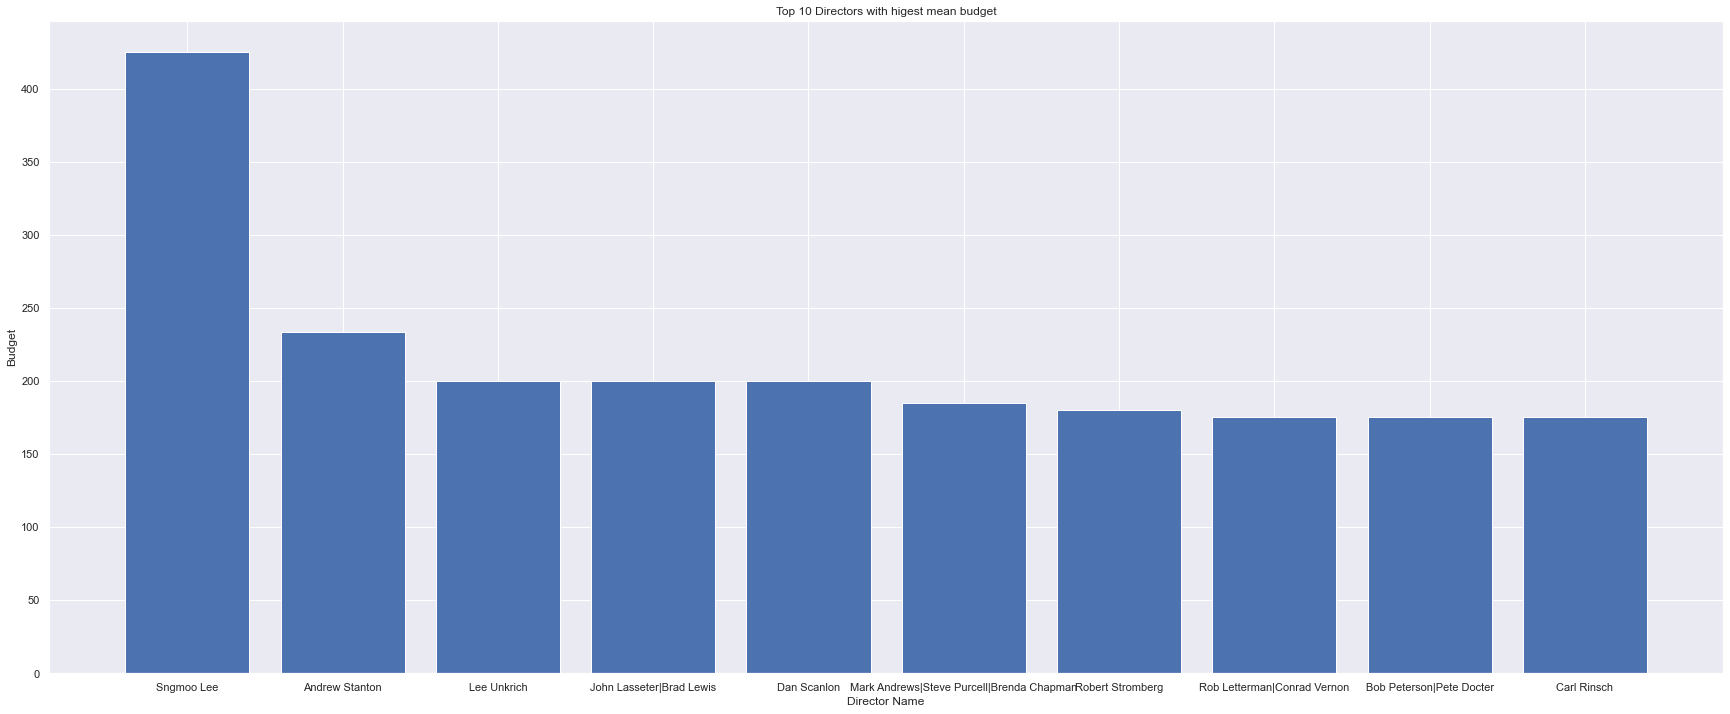

In [78]:
plt.figure(figsize=(30,12))
plt.bar(top_directors['budget'].sort_values(ascending=False).head(10).index,top_directors['budget'].sort_values(ascending=False).head(10))
plt.title("Top 10 Directors with higest mean budget")
plt.xlabel("Director Name")
plt.ylabel("Budget")

Text(0, 0.5, 'Budget')

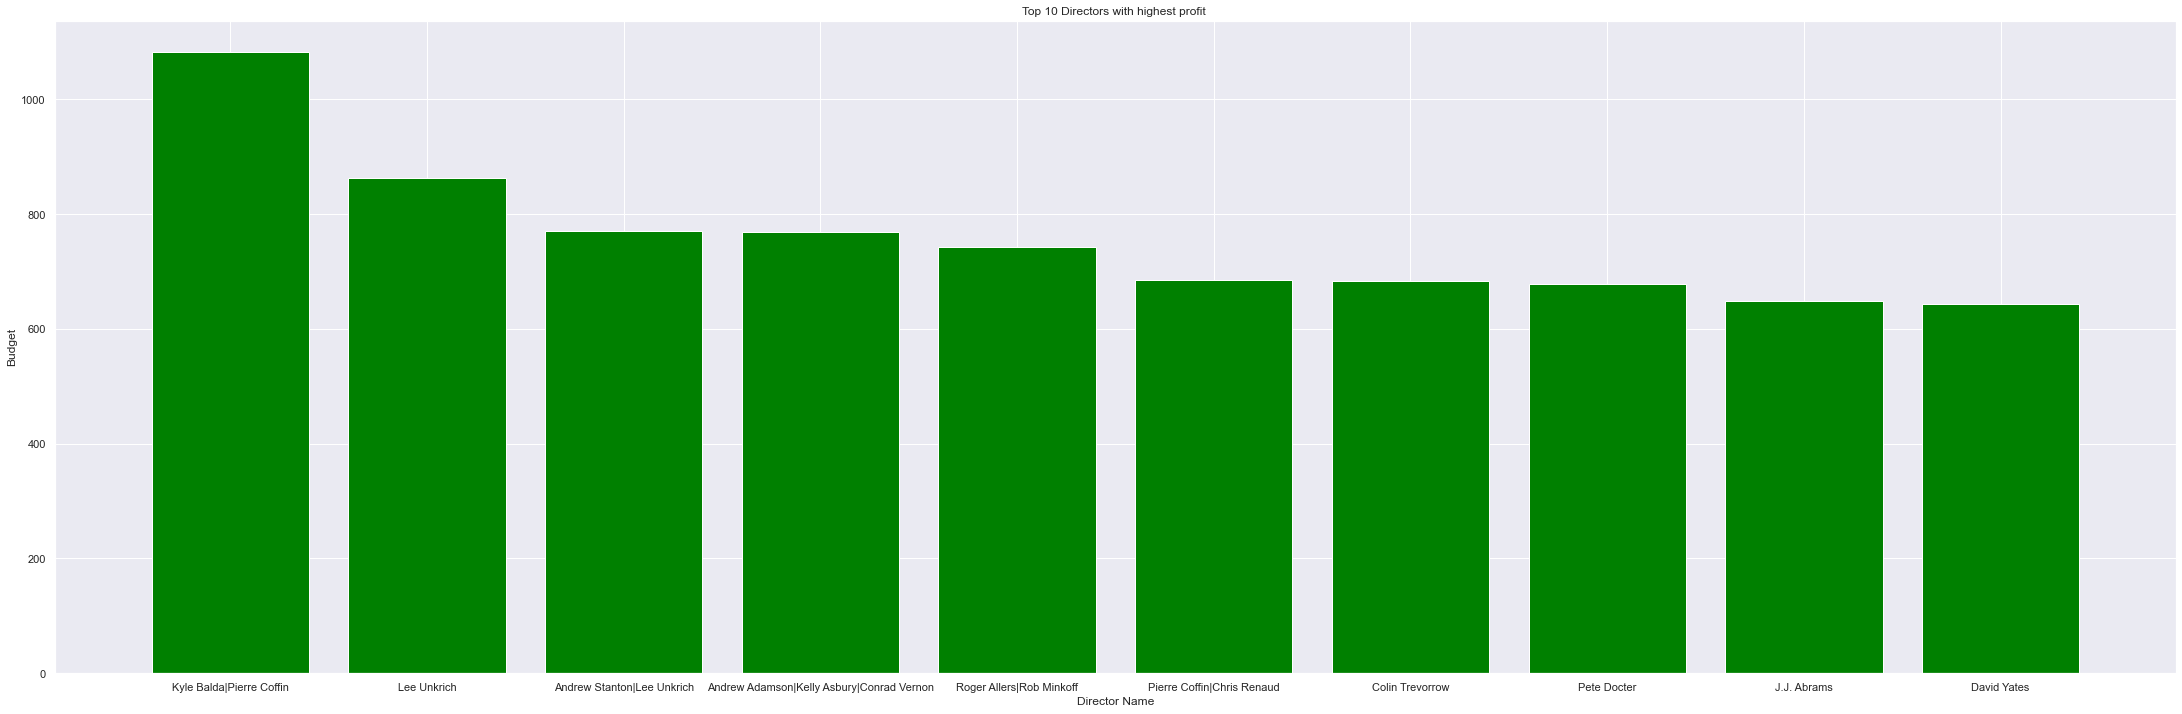

In [93]:
plt.figure(figsize=(38,12))
plt.bar(top_directors['profit'].sort_values(ascending=False).head(10).index,top_directors['profit'].sort_values(ascending=False).head(10),color='green')
plt.title("Top 10 Directors with highest profit ")
plt.xlabel("Director Name")
plt.ylabel("Budget")

Index(['imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'release_date', 'vote_count', 'release_year', 'budget_adj',
       'revenue_adj', 'genres', 'profit'],
      dtype='object')

In [82]:
movies_df=movies.copy()
s = movies_df['cast'].str.split('|').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'cast'
del movies_df['cast']
movies_df = movies_df.join(s)

In [84]:
cast=movies_df.groupby('cast').mean()

In [168]:
movie_title=movies.groupby('original_title').mean()

In [176]:
top_revenue=movie_title['revenue'].sort_values(ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 actors with highest profits ')

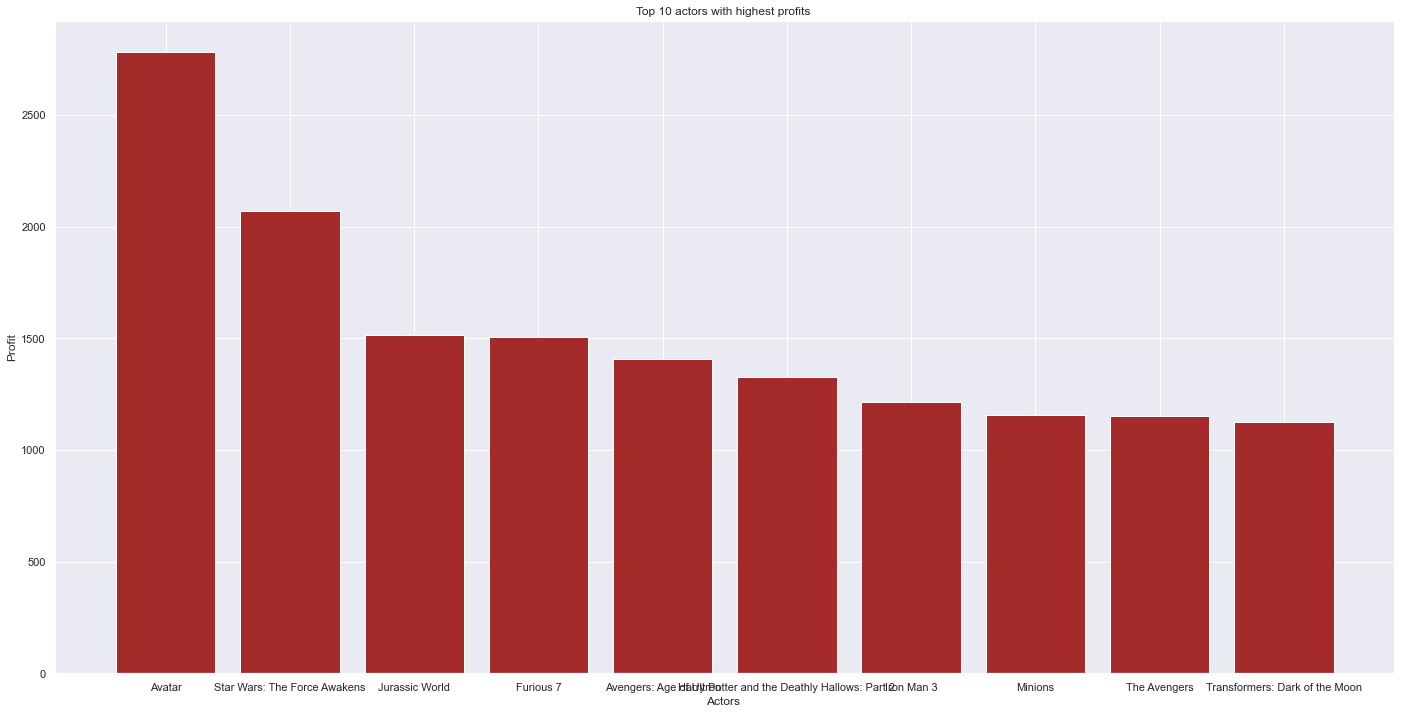

In [179]:
plt.figure(figsize=(24,12))
plt.bar(top_revenue.index,top_revenue,color='brown')
plt.xlabel("Actors ")
plt.ylabel("Profit")
plt.title("Top 10 actors with highest profits ")

Text(0.5, 1.0, 'Top 10 actors with highest profits ')

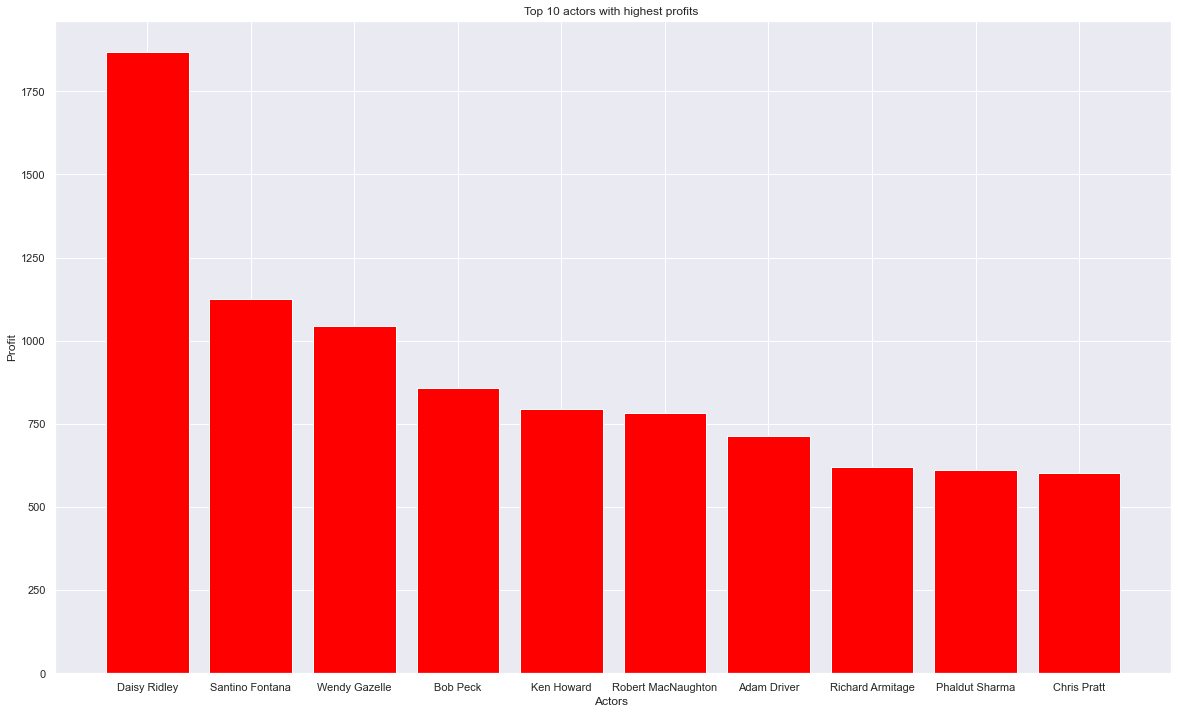

In [92]:
plt.figure(figsize=(20,12))
plt.bar(cast['profit'].sort_values(ascending=False).head(10).index,cast['profit'].sort_values(ascending=False).head(10),color='red')
plt.xlabel("Actors ")
plt.ylabel("Profit")
plt.title("Top 10 actors with highest profits ")

In [105]:
md_genre = (pd.DataFrame(movies.groupby('genres').original_title.nunique())).sort_values('original_title', ascending=True)

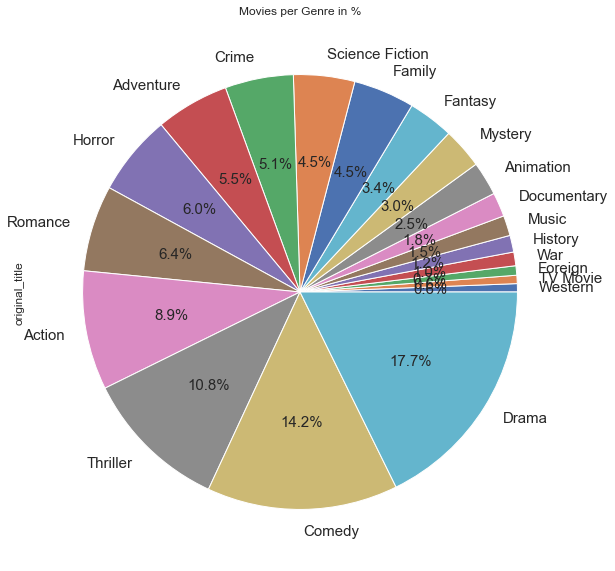

In [106]:
md_genre['original_title'].plot.pie(title= 'Movies per Genre in %', figsize=(10,10), autopct='%1.1f%%',fontsize=15);

In [108]:
md_year_genre_mean = pd.DataFrame(movies.groupby(['release_year','genres'])['revenue', 'budget','profit','vote_count',].mean())
md_year_genre_mean.head()

<ipython-input-108-cc7f0f08038a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  md_year_genre_mean = pd.DataFrame(movies.groupby(['release_year','genres'])['revenue', 'budget','profit','vote_count',].mean())


revenue    budget    profit  vote_count
release_year genres                                             
1960         Action     8.113125  1.750000  6.363125   65.875000
             Adventure  0.981000  0.550000  0.431000   82.000000
             Comedy     6.012500  0.753750  5.258750   44.875000
             Crime      0.000000  0.000000  0.000000   25.500000
             Drama      9.461538  1.215919  8.245619  138.153846

In [112]:
pivot=pd.pivot_table(md_year_genre_mean,columns=['release_year'],index=['genres'],values='profit')

<AxesSubplot:xlabel='release_year', ylabel='genres'>

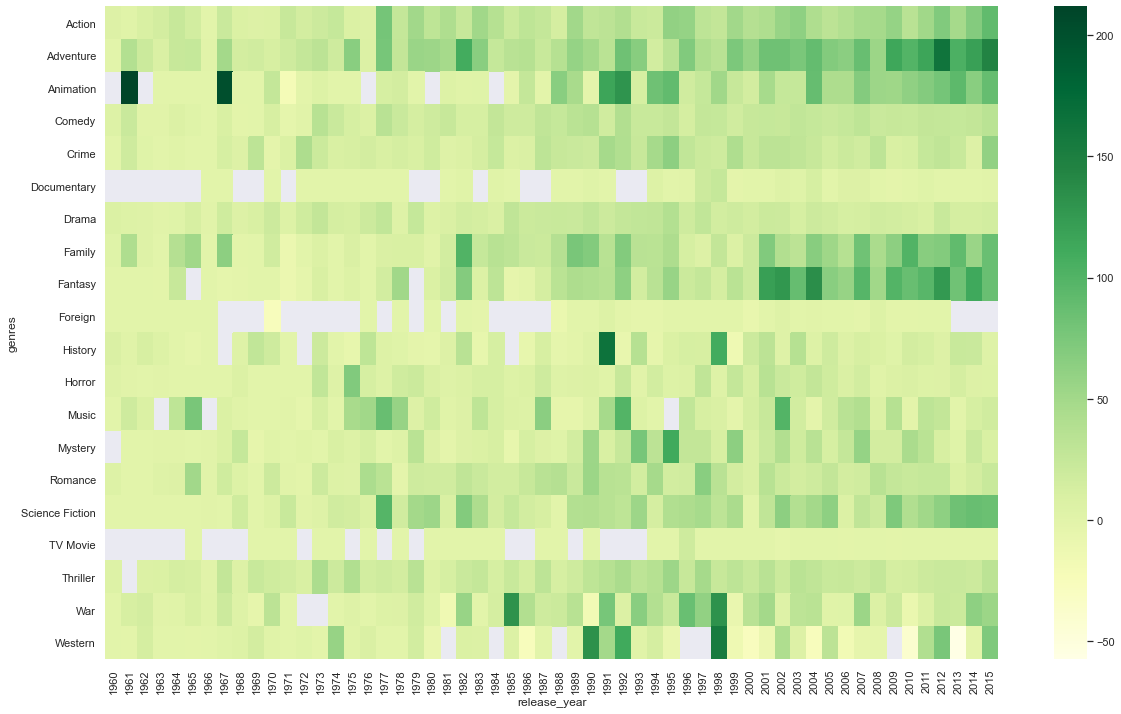

In [125]:
plt.figure(figsize=(20,12))
sns.heatmap(pivot,cmap='YlGn')

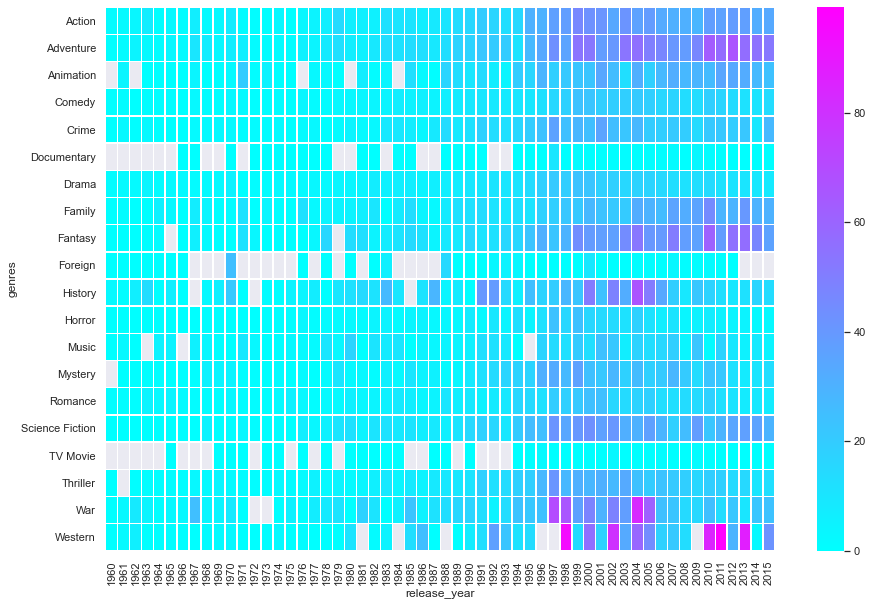

In [130]:
md_year_genre_budget = pd.DataFrame(movies.groupby(['release_year','genres'])['budget'].mean())
md_heat_budget_pivot = pd.pivot_table(md_year_genre_budget, values='budget', index=['genres'], columns=['release_year'])
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(md_heat_budget_pivot, linewidths=.5, cmap= 'cool');

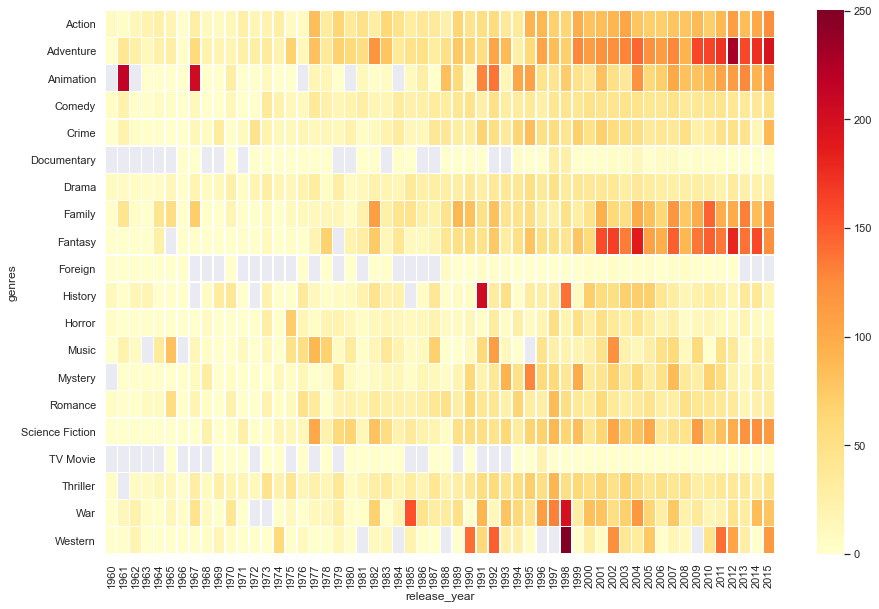

In [124]:
md_year_genre_budget = pd.DataFrame(movies.groupby(['release_year','genres'])['revenue'].mean())
md_heat_budget_pivot = pd.pivot_table(md_year_genre_budget, values='revenue', index=['genres'], columns=['release_year'])
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(md_heat_budget_pivot, linewidths=.5, cmap='YlOrRd');

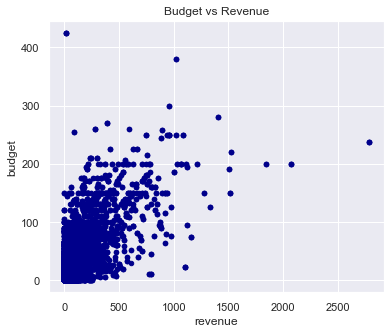

In [122]:
movies.plot.scatter(x='revenue', y='budget',title='Budget vs Revenue', color='DarkBlue', figsize=(6,5));

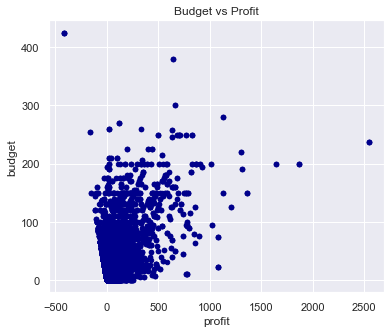

In [123]:
movies.plot.scatter(x='profit', y='budget',title='Budget vs Profit', color='DarkBlue', figsize=(6,5));

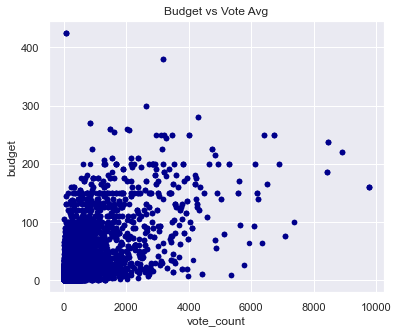

In [133]:
movies.plot.scatter(x='vote_count', y='budget',title='Budget vs Vote Avg', color='DarkBlue', figsize=(6,5));

1) Which are the movies with the third-lowest and third-highest budget?

In [154]:
a=movies.groupby('original_title')['budget'].mean().sort_values(ascending=False).index[2]
print("The Movie with third highest budget is =",a)

The Movie with third highest budget is = Pirates of the Caribbean: At World's End


In [337]:
b=movies['budget'].sort_values(ascending=True).index[2]
print("The Movie with third lowest budget is =",movies.iloc[b]['original_title'])

The Movie with third lowest budget is = Les 7 jours du talion


2) What is the average number of words in movie titles between the years 2000-2005?

In [375]:
d=movies[movies['release_year']>=2000]

In [376]:
d=d[d['release_year']<=2005]

In [377]:
d['Length']=d['original_title'].apply(lambda x: len(x.split()))

In [378]:
print("The average number of words in movies title from 2000 to 2005 is =",np.round(np.average(d['Length'])))

The average number of words in movies title from 2000 to 2005 is = 3.0


What is the most common Genre for Vin Diesel & Emma Watson movies?

In [229]:
movies_df=movies.copy()
s = movies_df['cast'].str.split('|').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'cast'
del movies_df['cast']
movies_df = movies_df.join(s)

In [250]:
a=movies_df[movies_df['cast']=='Vin Diesel']
vin_diesel=a['genres'].value_counts().idxmax()
print("The Common genre for Vin Diesel Movies is =",vin_diesel)

The Common genre for Vin Diesel Movies is = Action


In [255]:
b=movies_df[movies_df['cast']=='Emma Watson']
emma=b['genres'].value_counts().idxmax()
print("The Common genre for Emma Watson  Movies is =",emma)

The Common genre for Emma Watson  Movies is = Family


Which are the movies with the most and least earned revenue?

In [293]:
a=movies['revenue'].idxmin()
a=movies['original_title'][a].iloc[1]
print("The Movie with most least earned revenue is =",a)

The Movie with most least earned revenue is = Wild Card


In [295]:
b=movies['revenue'].idxmax()
b=movies['original_title'][b].iloc[1]
print("The Movie with most least earned revenue is =",b)

The Movie with most least earned revenue is = Avatar


What is the average runtime of movies in the year 2006?

In [354]:
print("The average runnig time of movies in year 2006 =",np.round(np.average(movies[movies['release_year']==2006]['runtime']),2),"Minutes")

The average runnig time of movies in year 2006 = 102.54 Minutes
